___
# Atividade: Combinação linear de variáveis aleatórias 

## Contexto Teórico
___

## Aula 17

**Preparo Prévio:**
1. Montgomery e Runger (6ª Edição): Seção 5.4 (págs 148 a 152). 

**Hoje:**
1. Reconhecer as variáveis aleatórias de interesse em um problema qualquer. 
2. Aplicar propriedades de esperança e variância quando há combinação linear entre variáveis aleatórias.


**Próxima aula:**
1. Leitura prévia necessária: Magalhães e Lima (7ª Edição): Seção 7.3 (págs 234 a 240).
2. Leitura prévia necessária: Montgomery e Runger (6ª Edição): Capítulo 7 (até Seção 7-2) (págs 191 a 198)
___

___
## Motivação 

A seguir, considere duas variáveis aleatórias, ambas contínuas, cujo objetivo seja somá-las!

Vamos criar um experimento. Sejam:

 $X \sim$ Uniforme$(4,7)$, ou seja, $a=4$ e $b=7$

e 

 $Y \sim$ Exponencial$(3)$, ou seja, $\beta=3$.

Inicialmente realizaremos o plot de ambas as distribuições univariadamente. Veja Aula12 caso tenha dúvidas com essas duas distribuições.


In [32]:
import pandas as pd
import numpy as np
from scipy.stats import uniform, expon, norm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Vamos criar uma faixa no eixo x, válida para ambas
eixo_x = np.linspace(-1, 15, 300)

In [3]:
# X: uniforme entre 4 a 7
a = 4
b = 7
loc_unif = a
scale_unif = b - a # Veja o zôo de distribuições
pdf_unif = uniform.pdf(eixo_x, loc=loc_unif, scale=scale_unif)

In [4]:
# Y: exponencial com média 3
scale_exp = 3
pdf_exp = expon.pdf(eixo_x, scale=scale_exp)

___
Agora realizaremos o *plot* de ambas sobre o mesmo eixo:

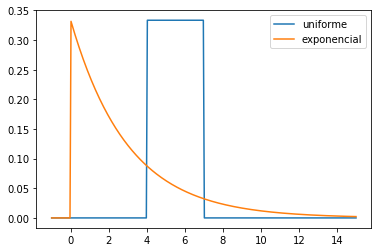

In [5]:
plt.plot(eixo_x, pdf_unif, label="uniforme")
plt.plot(eixo_x, pdf_exp, label="exponencial")
plt.legend(loc='upper right');


## Entretanto, o que significa fazer $Z = X + Y$ ?

___
## Programando a função X + Y

Para vermos como ficaria a função $X + Y$, devemos:
* Obter uma amostra de X
* Obter uma amostra de Y
* Somar ambas as amostras

No `scipy.stats`, a função que gera uma amostra conforme uma distribuição é a `rvs()`. Por exemplo, `uniform.rvs()` ou `expon.rvs`

Desta forma, vamos programar $Z = X + Y$

In [6]:
n = 50000
amostras = []

for i in range(n):
    x = uniform.rvs(loc=loc_unif, scale=scale_unif)
    y = expon.rvs(scale=scale_exp)
    z = x + y
    amostras.append(z)


In [7]:
x

4.578029968186162

Dependendo das distribuições somadas, a fórmula da distribuição resultante é conhecida. 

Agora vamos proceder de forma empírica e visualizar apenas o histograma do resultado, que deve lembrar o formato da distribuição resultante.

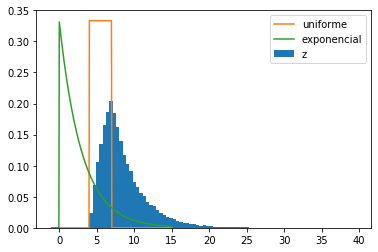

In [8]:
plt.hist(amostras, label="z", bins=80, density=True)
plt.plot(eixo_x, pdf_unif, label="uniforme")
plt.plot(eixo_x, pdf_exp, label="exponencial")
plt.legend(loc='upper right');

**Pontos importantes:** Implementar $X+Y$ é somar uma amostra de $X$ com uma amostra de $Y$ e obter uma nova distribuição, cuja área também valerá $1$!!!

___
## Melhorando a performance na simulação

Ao invés de fazer o *loop* para gerar $n$ amostrar em Python, podemos já pedir à função `rvs()` que realize $n$ sorteios utilizando argumento `size=n`. 

In [9]:
x_ = uniform.rvs(loc=loc_unif, scale=scale_unif, size=n)
y_ = expon.rvs(scale=scale_exp, size=n)
z_ = x_ + y_ # note que estamos somando elemento a elemento de x_ e y_ e obtendo um novo array

Analisando associação entre as duas variáveis simuladas X e Y:

In [10]:
#Cálculo da Correlação entre X e Y - via Numpy
np.corrcoef(x_,y_)

array([[1.        , 0.00455107],
       [0.00455107, 1.        ]])

In [11]:
#Cálculo da Correlação entre X e Y - via Pandas
pd.Series(x_).corr(pd.Series(y_))

0.004551069864640568

In [12]:
#Cálculo da Covariância entre X e Y - via Pandas
pd.Series(x_).cov(pd.Series(y_))

0.01190358795213017

Observe que o resultado não se altera, mas o desempenho é melhor

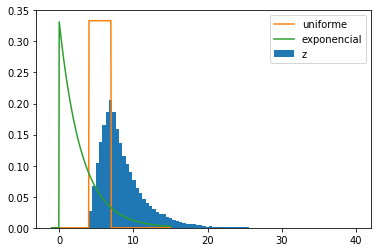

In [13]:
plt.hist(z_, label="z", bins=80, density=True)
plt.plot(eixo_x, pdf_unif, label="uniforme")
plt.plot(eixo_x, pdf_exp, label="exponencial")
plt.legend(loc='upper right');

___
## Propriedades de esperança e variância em combinação linear de variáveis aleatórias



### E(Z): Valor esperado da Z calculada a partir dos dados gerados

In [14]:
z_.mean()

8.506024439611032

In [15]:
np.mean(z_)

8.506024439611032

### Var(Z): Variância da Z calculada a partir dos dados gerados

In [16]:
z_.var()

9.919792718458597

In [17]:
np.var(z_, ddof=0) # o denominador da variância tem um termo (n - ddof).

9.919792718458597

___
## Contrastando com previsão teórica

Dica: Reveja as aulas de **modelos probabilísticos contínuos** - uniforme e exponencial

### E(Z): Valor esperado da Z calculada a partir da teoria

**Previsão teórica de E(Z) = E(X)  + E(Y)**

Relembrando:

- Para a Uniforme temos:

$$E(X) = \frac{a + b}{2} = 5.5$$

- Para a Exponencial temos:

$$E(Y) = \beta = 3$$

Portanto, 

$$E(Z) = E(X + Y) = 8.5$$


### Var(Z): Variância da Z calculada a partir da teoria

**Previsão teórica de Var(Z) = Var(X) + Var(Y) + 2 * Cov(X,Y)**

Relembrando:

- Para a Uniforme temos:

$$ \sigma^2_X = Var(X) = \frac{(b-a)^2}{12} = 0.75$$

- Para a exponencial temos:

$$\sigma^2_Y = Var(Y) = \beta^2 = 9$$

Portanto, assumindo que as variáveis são INDEPENDENTES até mesmo pela maneira que foram geradas, então:

$$Var(Z) = Var(X) + Var(Y) = \sigma_X^2 + \sigma_Y^2 =  9.75$$


**Os valores de E(Z) e Var(Z) calculados a partir dos dados gerados ficam bem próximos da previsão teórica!**

___
# EXERCÍCIOS

___
## Exercício 1

Sejam $X \sim Exp(\beta=10)$ e $Y \sim Exp(\beta=20)$, duas variáveis aleatórias independentes.  

Vamos definir a variável aleatória $Z$ como $Z = 2X + 3Y$

Responda:

**a.** Qual deve ser $E(Z)$ e $Var(Z)$? Responda usando a teoria.

**Resposta**:
### Esperança de Z:
$E(z) = 2 \cdot E(x) + 3 \cdot E(y)$

$E(z) = 2 \cdot 10 + 3 \cdot 20$

$E(z) = 80$
### Variância de Z: 
$Var(z) = 4 \cdot Var(x) + 9 \cdot Var(y)$

$Var(z) = 4 \cdot 100 + 9 \cdot 400$

$Var(z) = 4000$

**b.** Verifique, através de simulação, o resultado anterior.  Não se esqueça de apresentar os valores de $E(Z)$ e $Var(Z)$ obtidos a partir dos dados

In [34]:
X1 = expon.rvs(scale=10, size=n)
Y1 = expon.rvs(scale=20, size=n)
Z1 = 2*X1 + 3*Y1
print("Média de z: {}".format(Z1.mean()))
print("Variança de z: {}".format(Z1.var()))

Média de z: 79.66592724895655
Variança de z: 3991.6976060410916


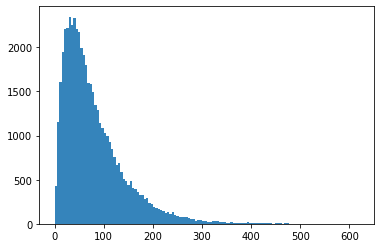

In [56]:
plt.hist(Z1,bins=130,alpha=0.9);

___
## Exercício 2

Dadas duas variáveis aleatórias normais $X$ e $Y$, não correlacionadas entre si, com médias de 100 e 150, e desvios padrão de 30 e 40, respectivamente:

**a** Quais seriam $E(X + Y)$ e $V(X + Y)$ conforme a teoria? Que formato teria a distribuição?

**Resposta**:
### Esperança de Z:
$E(z) = E(x) + E(y)$

$E(z) = 100 + 150$

$E(z) = 250$
### Variância de Z: 
$Var(z) = Var(x) + Var(y)$

$Var(z) = 30^2 + 40^2$

$Var(z) = 2500$

**b** Simule este resultado.

In [77]:
X2 = norm.rvs(loc=100 ,scale=30, size=5*n)
Y2 = norm.rvs(loc=150 ,scale=40, size=5*n)
Z2 = X2 + Y2
print("Média de z: {}".format(Z2.mean().round(0)))
print("Variança de z: {}".format(Z2.var().round(0)))

Média de z: 250.0
Variança de z: 2507.0


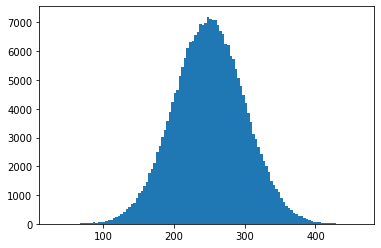

In [78]:
plt.hist(Z2, bins=120);

## Exercício 3

Os arquivos var1.csv e var2.csv contém amostras **correlacionadas** de duas variáveis aleatórias **não independentes** $X$ e $Y$.

Dados:

$E(x) = \mu_X = 20$

$E(y) = \mu_Y = 25$

$Var(x) = \sigma_X^2 = 25$

$Var(y) = \sigma_Y^2 = 16$

$Cov(X,Y) = 10$


Faça:
* Calcule a média e o desvio padrão de Z = X + Y usando a teoria
* verifique nos dados se o resultado é coerente


**Resposta usando teoria**
### Esperança:
$E(z) = E(x) + E(y)$

$E(z) = 20 + 25$

$E(z) = 45$
### Variância: 
$Var(z) = Var(x) + Var(y) + 2 \cdot 1 \cdot 1 \cdot Cov(X,Y)$

$Var(z) = 25 + 16 + 2 \cdot 10$

$Var(z) = 61$

**Agora simulação**

In [97]:
var1 = pd.read_csv("var1.csv",header=None)[1]
var2 = pd.read_csv("var2.csv",header=None)[1]
varz = var1 + var2
cov  = var1.cov(var2)
print("Covariança: {}".format(cov))
print("Esperança: {}".format(varz.mean()))
print("Variança: {}".format(varz.var()))

Covariança: 9.94240808292163
Esperança: 45.051758138707584
Variança: 58.97928363410342


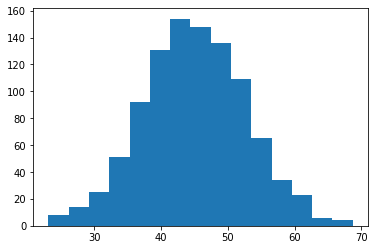

In [96]:
plt.hist(varz, bins=15);

___
## Exercício 4

Um processo industrial pode ser executado em duas etapas independentes. O tempo gasto em cada etapa segue uma distribuição com média de 5 horas e desvio-padrão de 10 horas. 
Um engenheiro resolveu modificar o processo de produção fazendo com que seja executado numa única fase, cujo tempo de execução é o dobro da primeira etapa do processo atual.
Vale a pena adotar o processo proposto pelo engenheiro?


 
**R.:** 

...


___
## Exercício 5 

Uma pessoa irá comprar uma camisa e uma calça. Os dois produtos serão adquiridos numa mesma loja. O preço da camisa segue uma distribuição aproximadamente normal de média 45,00 reais e desvio-padrão 3,00 reais. O preço da calça segue uma distribuição aproximadamente normal de média 60,00 reais e desvio-padrão 5,00 reais. Sabe-se ainda que a correlação entre os preços da camisa e da calça é da ordem de 0,25 e que o gasto com a compra de uma camisa e uma calça seja modelado por uma distribuição normal.

a) Uma pessoa possui apenas 95,00 reais para comprar a camisa e a calça, indo a um único estabelecimento escolhido ao acaso, qual é a probabilidade de conseguir comprar os dois produtos? Considere que o gasto total com a compra de uma calça e uma camisa também segue uma distribuição aproximadamente normal.

b) Indo a um único estabelecimento, qual a probabilidade de se pagar mais caro na camisa do que na calça?



**R.:** 

...

___
## Exercício 6

O preço de compra, em reais, de cada unidade da matéria-prima M1 não é fixo (único), pois pode variar de região para região brasileira. Neste caso, assuma que o preço de M1 pode ser modelado por uma distribuição normal com média 15 reais e desvio padrão 3 reais. 

a) Qual é o menor valor cobrado pela matéria-prima M1 referente aos 39% dos locais mais careiros?

b) Um determinado produto, que será lançado no mercado, é composto por três unidades de mesmo valor da matéria-prima M1. Ainda, na fabricação desse produto, há um custo fixo de 30 reais por produto produzido. O valor comercializado de cada produto será definido para que se tenha um lucro de 35% sobre o valor da etiqueta. Encontre a esperança, variância e distribuição do valor comercializado de cada produto.


**R.:** ...